### 美国政治献金

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, Index

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
# 候选人
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']

# 候选人和所在政党的映射字典
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

In [3]:
election = pd.read_csv('usa_election.txt', low_memory=False)

In [4]:
election.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [7]:
election['cand_nm'].unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [8]:
election['party'] = election['cand_nm'].map(parties)
election.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [9]:
election.head(1)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [10]:
election['party'].unique()

array(['Republican', 'Democrat', 'Reform', 'Libertarian'], dtype=object)

In [11]:
election['party'].value_counts()

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
Name: party, dtype: int64

In [13]:
election.groupby('party')['contb_receipt_amt'].sum() / 1000000

party
Democrat        81.057579
Libertarian      0.413277
Reform           0.339034
Republican     119.225484
Name: contb_receipt_amt, dtype: float64

In [16]:
election.groupby(['contb_receipt_dt', 'party'])['contb_receipt_amt'].sum()

contb_receipt_dt  party      
01-APR-11         Reform              50.00
                  Republican       12635.00
01-AUG-11         Democrat        175281.00
                  Libertarian       1000.00
                  Reform            1847.00
                  Republican      234598.46
01-DEC-11         Democrat        651532.82
                  Libertarian        725.00
                  Reform             875.00
                  Republican      486405.96
01-FEB-11         Republican         250.00
01-JAN-11         Republican        8600.00
01-JAN-12         Democrat         58098.80
                  Reform             515.00
                  Republican       75704.72
01-JUL-11         Democrat        165961.00
                  Libertarian       2000.00
                  Reform             100.00
                  Republican      115848.72
01-JUN-11         Democrat        145459.00
                  Libertarian        500.00
                  Reform              50.00
  

In [18]:
election.dtypes

cmte_id               object
cand_id               object
cand_nm               object
contbr_nm             object
contbr_city           object
contbr_st             object
contbr_zip            object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
receipt_desc          object
memo_cd               object
memo_text             object
form_tp               object
file_num               int64
party                 object
dtype: object

In [19]:
election['contb_receipt_dt'].unique()

array(['20-JUN-11', '23-JUN-11', '05-JUL-11', '01-AUG-11', '21-JUN-11',
       '22-JUN-11', '17-JUN-11', '11-JUL-11', '08-JUL-11', '27-JUN-11',
       '13-JUN-11', '16-JUN-11', '18-JUL-11', '05-AUG-11', '01-JUL-11',
       '06-JUL-11', '13-JUL-11', '28-JUN-11', '30-JUN-11', '08-AUG-11',
       '15-AUG-11', '16-AUG-11', '18-AUG-11', '24-JUN-11', '11-OCT-11',
       '14-JUL-11', '29-JUN-11', '18-OCT-11', '30-SEP-11', '11-AUG-11',
       '02-AUG-11', '14-JUN-11', '23-AUG-11', '07-JUL-11', '25-JUL-11',
       '21-JUL-11', '24-OCT-11', '12-JUL-11', '28-JUL-11', '09-SEP-11',
       '10-NOV-11', '12-SEP-11', '04-OCT-11', '05-DEC-11', '31-OCT-11',
       '12-DEC-11', '29-JUL-11', '22-JUL-11', '27-OCT-11', '28-NOV-11',
       '26-AUG-11', '26-SEP-11', '27-JUL-11', '28-APR-11', '31-DEC-11',
       '29-DEC-11', '22-NOV-11', '28-JAN-12', '29-NOV-11', '21-AUG-11',
       '16-MAY-11', '18-MAY-11', '12-MAY-11', '19-MAY-11', '19-SEP-11',
       '16-APR-11', '15-MAY-11', '15-JUN-11', '11-SEP-11', '06-S

In [23]:
from datetime import datetime
def to_datetime(item):
    # item -> str   20-JUN-11
    return datetime.strptime(item, '%d-%b-%y')

In [24]:
election['contb_receipt_dt'] = election['contb_receipt_dt'].map(to_datetime)

In [25]:
election.dtypes

cmte_id                      object
cand_id                      object
cand_nm                      object
contbr_nm                    object
contbr_city                  object
contbr_st                    object
contbr_zip                   object
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt     datetime64[ns]
receipt_desc                 object
memo_cd                      object
memo_text                    object
form_tp                      object
file_num                      int64
party                        object
dtype: object

In [26]:
election.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,2011-06-20,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,2011-06-23,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,2011-07-05,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,2011-08-01,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,2011-06-20,NaN,NaN,NaN,SA17A,736166,Republican


In [27]:
es = election.sort_values('contb_receipt_dt')
es.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
478480,C00496067,P00003608,"Cain, Herman","MAREK, JOHN",WAUKESHA,WI,531899772,INFORMATION REQUESTED,INFORMATION REQUESTED,2400.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
475327,C00496067,P00003608,"Cain, Herman","STOLTENBERG, WAYNE",WESTLAKE,TX,762629076,CINCO RESOURCES,CFO,5200.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
475328,C00496067,P00003608,"Cain, Herman","TRIBBLE, JAMES",HOUSTON,TX,770795026,NONE,RETIRED,1000.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
478481,C00496067,P00003608,"Cain, Herman","SIDNEY, SCOTT",CEDARBURG,WI,530122317,SELF EMPLOYED,CONTRACTOR,2400.0,2011-01-03,NaN,NaN,NaN,SA17A,755790,Republican
475329,C00496067,P00003608,"Cain, Herman","DAVIS, JEREMY S MR.",HOUSTON,TX,770252267,INTL PETROLEUM ASSOC OF AMERICA,INVESTOR,2400.0,2011-01-03,NaN,NaN,NaN,SA17A,755790,Republican


In [30]:
es_1 = es.groupby(['contb_receipt_dt', 'party'])['contb_receipt_amt'].sum()
es_1

contb_receipt_dt  party     
2011-01-01        Republican       8600.00
2011-01-03        Republican       4800.00
2011-01-04        Republican       5000.00
2011-01-12        Republican       4150.00
2011-01-13        Republican       4000.00
2011-01-14        Republican       6000.00
2011-01-15        Republican        500.00
2011-01-16        Republican        750.00
2011-01-17        Republican        500.00
2011-01-18        Republican       4800.00
2011-01-20        Republican       2650.00
2011-01-21        Republican        250.00
2011-01-22        Republican        250.00
2011-01-24        Republican       2400.00
2011-01-26        Republican       5400.00
2011-01-27        Republican       2650.00
2011-01-28        Republican        650.00
2011-01-29        Republican        750.00
2011-01-31        Republican       6000.00
2011-02-01        Republican        250.00
2011-02-03        Republican       3250.00
2011-02-04        Republican       1000.00
2011-02-07        Republi

In [32]:
es_1.unstack(fill_value=0)
# es.rename_axis(axis=1) 修改行列坐标轴的名字

party,Democrat,Libertarian,Reform,Republican
contb_receipt_dt,,,,
2011-01-01,0.00,0.0,0.00,8600.00
2011-01-03,0.00,0.0,0.00,4800.00
2011-01-04,0.00,0.0,0.00,5000.00
2011-01-12,0.00,0.0,0.00,4150.00
2011-01-13,0.00,0.0,0.00,4000.00
2011-01-14,0.00,0.0,0.00,6000.00
2011-01-15,0.00,0.0,0.00,500.00
2011-01-16,0.00,0.0,0.00,750.00
2011-01-17,0.00,0.0,0.00,500.00


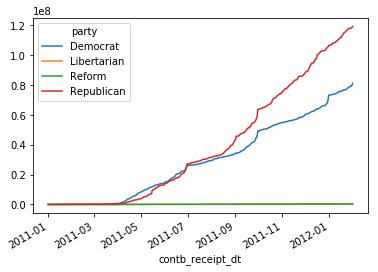

In [37]:
# DataFrame的plot()画线型图，每一列是一条线
# 它的行索引标签是x轴的刻度
es_1.unstack(fill_value=0).cumsum(axis=0).plot()

In [39]:
es_1.unstack(level=0, fill_value=0)  # 

contb_receipt_dt,2011-01-01 00:00:00,2011-01-03 00:00:00,2011-01-04 00:00:00,2011-01-12 00:00:00,2011-01-13 00:00:00,2011-01-14 00:00:00,2011-01-15 00:00:00,2011-01-16 00:00:00,2011-01-17 00:00:00,2011-01-18 00:00:00,...,2012-01-22 00:00:00,2012-01-23 00:00:00,2012-01-24 00:00:00,2012-01-25 00:00:00,2012-01-26 00:00:00,2012-01-27 00:00:00,2012-01-28 00:00:00,2012-01-29 00:00:00,2012-01-30 00:00:00,2012-01-31 00:00:00
party,,,,,,,,,,,,,,,,,,,,,
Democrat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,67194.23,337307.07,458909.23,438949.32,450268.94,305785.47,235492.85,93177.00,435921.72,1418410.31
Libertarian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Reform,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,450.00,225.00,500.00,282.00,25.00,3176.37,175.00,200.00,130.00,150.00
Republican,8600.0,4800.0,5000.0,4150.0,4000.0,6000.0,500.0,750.0,500.0,4800.0,...,507168.71,645477.15,462233.66,416931.39,256406.86,368441.82,82775.80,75220.02,255204.80,869890.41


In [43]:
es_2 = election[['cand_nm', 'contbr_nm', 'contbr_occupation', 'contb_receipt_amt']]
es_2.head()

,cand_nm,contbr_nm,contbr_occupation,contb_receipt_amt
0,"Bachmann, Michelle","HARVEY, WILLIAM",RETIRED,250.0
1,"Bachmann, Michelle","HARVEY, WILLIAM",RETIRED,50.0
2,"Bachmann, Michelle","SMITH, LANIER",INFORMATION REQUESTED,250.0
3,"Bachmann, Michelle","BLEVINS, DARONDA",RETIRED,250.0
4,"Bachmann, Michelle","WARDENBURG, HAROLD",RETIRED,300.0


In [50]:
es_2[es_2['contbr_occupation'] == 'DISABLED VETERAN']['cand_nm'].unique()

array(['Obama, Barack', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman'],
      dtype=object)

In [56]:
es_3 = es_2.groupby('cand_nm')['contb_receipt_amt'].max()
es_3

cand_nm
Bachmann, Michelle                   3022.00
Cain, Herman                        10000.00
Gingrich, Newt                       5100.00
Huntsman, Jon                        5000.00
Johnson, Gary Earl                   2500.00
McCotter, Thaddeus G                 4000.00
Obama, Barack                     1944042.43
Paul, Ron                            5000.00
Pawlenty, Timothy                   10000.00
Perry, Rick                         10000.00
Roemer, Charles E. 'Buddy' III        200.00
Romney, Mitt                        12700.00
Santorum, Rick                       5000.00
Name: contb_receipt_amt, dtype: float64

In [55]:
es_2.query('cand_nm=="Bachmann, Michelle" &  contb_receipt_amt == 3022.00')

,cand_nm,contbr_nm,contbr_occupation,contb_receipt_amt
514665,"Bachmann, Michelle","LIBERAL, NICOL",GOVERNMENT MEMBER,3022.0


In [64]:
for item in es_3.index:
    print(item, es_3[item])

Bachmann, Michelle 3022.0
Cain, Herman 10000.0
Gingrich, Newt 5100.0
Huntsman, Jon 5000.0
Johnson, Gary Earl 2500.0
McCotter, Thaddeus G 4000.0
Obama, Barack 1944042.43
Paul, Ron 5000.0
Pawlenty, Timothy 10000.0
Perry, Rick 10000.0
Roemer, Charles E. 'Buddy' III 200.0
Romney, Mitt 12700.0
Santorum, Rick 5000.0


In [67]:
sql = 'cand_nm=="{}" &  contb_receipt_amt == {}'
result=DataFrame(columns=es_2.columns)   # 创建空的DataFrame

for index in es_3.index:
    r = es_2.query(sql.format(index, es_3[index]))
    result = result.append(r)
result

,cand_nm,contbr_nm,contbr_occupation,contb_receipt_amt
514665,"Bachmann, Michelle","LIBERAL, NICOL",GOVERNMENT MEMBER,3022.00
478807,"Cain, Herman","HILDE, AL",INFORMATION REQUESTED,10000.00
488731,"Gingrich, Newt","POPE, MARK C. MR. III",RETIRED,5100.00
518904,"Huntsman, Jon","KAYNE, RICHARD A. MR.",INVESTMENT MANAGEMENT,5000.00
518946,"Huntsman, Jon","TRAINA, TREVOR MR.",SELF-EMPLOYED,5000.00
519065,"Huntsman, Jon","SORENSEN, VERLA MRS.",HOMEMAKER,5000.00
519829,"Huntsman, Jon","TEXTOR, JOHN C. MR.",CEO,5000.00
520028,"Huntsman, Jon","RAUNER, BRUCE VINCENT MR.",CHAIRMAN,5000.00
520031,"Huntsman, Jon","RAUNER, DIANA MRS.",PRESIDENT,5000.00
520559,"Huntsman, Jon","JACOBS, BENJAMIN",EXECUTIVE,5000.00


In [68]:
result.reset_index(drop=True)

,cand_nm,contbr_nm,contbr_occupation,contb_receipt_amt
0,"Bachmann, Michelle","LIBERAL, NICOL",GOVERNMENT MEMBER,3022.00
1,"Cain, Herman","HILDE, AL",INFORMATION REQUESTED,10000.00
2,"Gingrich, Newt","POPE, MARK C. MR. III",RETIRED,5100.00
3,"Huntsman, Jon","KAYNE, RICHARD A. MR.",INVESTMENT MANAGEMENT,5000.00
4,"Huntsman, Jon","TRAINA, TREVOR MR.",SELF-EMPLOYED,5000.00
5,"Huntsman, Jon","SORENSEN, VERLA MRS.",HOMEMAKER,5000.00
6,"Huntsman, Jon","TEXTOR, JOHN C. MR.",CEO,5000.00
7,"Huntsman, Jon","RAUNER, BRUCE VINCENT MR.",CHAIRMAN,5000.00
8,"Huntsman, Jon","RAUNER, DIANA MRS.",PRESIDENT,5000.00
9,"Huntsman, Jon","JACOBS, BENJAMIN",EXECUTIVE,5000.00
